In [3]:
import ee
from osgeo import gdal
from osgeo import osr
import pandas as pd
import numpy as np
import time
import requests

ee.Initialize()

In [4]:
tab = pd.read_csv('Mariana_anomaly.csv')

In [5]:
tabin = tab.set_index(['Latitude','Longitude'])
tabin.tail()

02-08-2013  05-08-2014  25-09-2015  11-10-2015  \
Latitude Longitude                                                     
-20.1911 -43.4247   5.426648e-07   -0.000277   -0.000893   -0.000736   
         -43.4245   1.816329e-07   -0.000183   -0.000841   -0.000711   
         -43.4244   1.599184e-07   -0.000257   -0.000944   -0.000753   
         -43.4243  -3.901135e-06   -0.000213   -0.001095   -0.000850   
         -43.4241  -5.998139e-06   -0.000194   -0.000978   -0.000785   

                    25-07-2016  10-08-2016  29-08-2017  20-01-2018  \
Latitude Longitude                                                   
-20.1911 -43.4247    -0.000012   -0.000529   -0.000012    0.000327   
         -43.4245    -0.000052   -0.000406    0.000001    0.000080   
         -43.4244    -0.000060   -0.000524   -0.000022    0.000210   
         -43.4243    -0.000032   -0.000513   -0.000012    0.000099   
         -43.4241    -0.000050   -0.000437    0.000013    0.000070   

                      28-05-2018  01-09-2018  ...  25-06-2020    11-07-2020  \
Latitude Longitude                            ...                             
-20.1911 -43.4247   2.312226e-06    0.000004  ...   -0.000036  1.257525e-05   
         -43.4245   2.434125e-05   -0.000012  ...   -0.000097  3.041122e-07   
         -43.4244   9.709284e-06   -0.000012  ...   -0.000100 -7.915465e-06   
         -43.4243   7.262874e-07   -0.000014  ...   -0.000095 -1.063504e-06   
         -43.4241  -5.876870e-07   -0.000002  ...   -0.000053 -2.401823e-07   

                      13-09-2020  29-09-2020  One-Class SVM  \
Latitude Longitude                                            
-20.1911 -43.4247  -4.003058e-06   -0.000907              4   
         -43.4245   9.981144e-07   -0.000884              5   
         -43.4244   9.286759e-06   -0.000946              4   
         -43.4243   4.192819e-06   -0.000879              5   
         -43.4241  -4.506313e-06   -0.000940              3   

                    Local Outlier Factor  Isolation Forest  Robust Covariance  \
Latitude Longitude                                                              
-20.1911 -43.4247                     12                 7                  7   
         -43.4245                      9                 9                  7   
         -43.4244                      9                 7                  7   
         -43.4243                      8                 7                  7   
         -43.4241                      8                 7                  7   

                    K-Means  DBSCAN  
Latitude Longitude                   
-20.1911 -43.4247         1       5  
         -43.4245         1       4  
         -43.4244         1       4  
         -43.4243         1       4  
         -43.4241         1       4  

[5 rows x 77 columns]

In [12]:
dftime = tabin.iloc[:,:-6]
dftime.head()

02-08-2013  05-08-2014  25-09-2015  11-10-2015  \
Latitude Longitude                                                   
-20.2453 -43.4950    -0.000033   -0.000194   -0.000479   -0.000229   
         -43.4949    -0.000052   -0.000198   -0.000610   -0.000322   
         -43.4947    -0.000163   -0.000006   -0.000684   -0.000363   
         -43.4946    -0.000122   -0.000007   -0.000631   -0.000326   
         -43.4945    -0.000192   -0.000004   -0.000604   -0.000321   

                    25-07-2016  10-08-2016  29-08-2017  20-01-2018  \
Latitude Longitude                                                   
-20.2453 -43.4950    -0.000003   -0.000524   -0.000116    0.000105   
         -43.4949    -0.000058   -0.000484   -0.000079    0.000269   
         -43.4947    -0.000156   -0.000404   -0.000046    0.000361   
         -43.4946    -0.000064   -0.000422   -0.000084    0.000048   
         -43.4945    -0.000171   -0.000414   -0.000083    0.000124   

                    28-05-2018    01-09-2018  ...  10-08-2019  11-09-2019  \
Latitude Longitude                            ...                           
-20.2453 -43.4950     0.000027 -8.441663e-06  ...   -0.008105   -0.000194   
         -43.4949    -0.000087 -2.466818e-06  ...   -0.008722   -0.000225   
         -43.4947     0.000229  1.255498e-07  ...   -0.007011   -0.000065   
         -43.4946     0.000228 -5.340677e-07  ...   -0.004996   -0.000062   
         -43.4945     0.000277  5.417275e-07  ...   -0.005141   -0.000057   

                    13-10-2019  16-12-2019  02-02-2020  09-06-2020  \
Latitude Longitude                                                   
-20.2453 -43.4950     0.000002   -0.000915   -0.000670   -0.000495   
         -43.4949    -0.000045   -0.000635   -0.000615   -0.000664   
         -43.4947     0.000003   -0.000711   -0.000692   -0.000970   
         -43.4946     0.000004   -0.001143   -0.001000   -0.000783   
         -43.4945     0.000005   -0.000846   -0.000968   -0.001078   

                    25-06-2020  11-07-2020  13-09-2020  29-09-2020  
Latitude Longitude                                                  
-20.2453 -43.4950    -0.000296   -0.037669   -0.000018   -0.000845  
         -43.4949    -0.000358   -0.052209    0.000019   -0.000995  
         -43.4947    -0.000502   -0.058080    0.000003   -0.000741  
         -43.4946    -0.000540   -0.065237   -0.000002   -0.000600  
         -43.4945    -0.000602   -0.071281    0.000010   -0.000700  

[5 rows x 71 columns]

In [16]:
dftime.head()

2013-02-08  2013-05-05  2013-05-21  2013-08-07  \
Latitude Longitude                                                   
-20.2453 -43.4950    -0.000033   -0.000194   -0.000479   -0.000229   
         -43.4949    -0.000052   -0.000198   -0.000610   -0.000322   
         -43.4947    -0.000163   -0.000006   -0.000684   -0.000363   
         -43.4946    -0.000122   -0.000007   -0.000631   -0.000326   
         -43.4945    -0.000192   -0.000004   -0.000604   -0.000321   

                    2013-08-25  2013-09-08  2013-10-28  2014-05-08  \
Latitude Longitude                                                   
-20.2453 -43.4950    -0.000003   -0.000524   -0.000116    0.000105   
         -43.4949    -0.000058   -0.000484   -0.000079    0.000269   
         -43.4947    -0.000156   -0.000404   -0.000046    0.000361   
         -43.4946    -0.000064   -0.000422   -0.000084    0.000048   
         -43.4945    -0.000171   -0.000414   -0.000083    0.000124   

                    2014-06-25    2014-08-28  ...  2019-11-09  2019-12-16  \
Latitude Longitude                            ...                           
-20.2453 -43.4950     0.000027 -8.441663e-06  ...   -0.008105   -0.000194   
         -43.4949    -0.000087 -2.466818e-06  ...   -0.008722   -0.000225   
         -43.4947     0.000229  1.255498e-07  ...   -0.007011   -0.000065   
         -43.4946     0.000228 -5.340677e-07  ...   -0.004996   -0.000062   
         -43.4945     0.000277  5.417275e-07  ...   -0.005141   -0.000057   

                    2020-01-05  2020-02-02  2020-02-06  2020-06-25  \
Latitude Longitude                                                   
-20.2453 -43.4950     0.000002   -0.000915   -0.000670   -0.000495   
         -43.4949    -0.000045   -0.000635   -0.000615   -0.000664   
         -43.4947     0.000003   -0.000711   -0.000692   -0.000970   
         -43.4946     0.000004   -0.001143   -0.001000   -0.000783   
         -43.4945     0.000005   -0.000846   -0.000968   -0.001078   

                    2020-09-06  2020-09-13  2020-09-29  2020-11-07  
Latitude Longitude                                                  
-20.2453 -43.4950    -0.000296   -0.037669   -0.000018   -0.000845  
         -43.4949    -0.000358   -0.052209    0.000019   -0.000995  
         -43.4947    -0.000502   -0.058080    0.000003   -0.000741  
         -43.4946    -0.000540   -0.065237   -0.000002   -0.000600  
         -43.4945    -0.000602   -0.071281    0.000010   -0.000700  

[5 rows x 71 columns]

In [26]:
dataframes = [dftime, tabin.iloc[:,-6:]]
result = pd.concat(dataframes, axis=1)
result.head()

2013-02-08 00:00:00  2013-05-05 00:00:00  \
Latitude Longitude                                             
-20.2453 -43.4950             -0.000033            -0.000194   
         -43.4949             -0.000052            -0.000198   
         -43.4947             -0.000163            -0.000006   
         -43.4946             -0.000122            -0.000007   
         -43.4945             -0.000192            -0.000004   

                    2013-05-21 00:00:00  2013-08-07 00:00:00  \
Latitude Longitude                                             
-20.2453 -43.4950             -0.000479            -0.000229   
         -43.4949             -0.000610            -0.000322   
         -43.4947             -0.000684            -0.000363   
         -43.4946             -0.000631            -0.000326   
         -43.4945             -0.000604            -0.000321   

                    2013-08-25 00:00:00  2013-09-08 00:00:00  \
Latitude Longitude                                             
-20.2453 -43.4950             -0.000003            -0.000524   
         -43.4949             -0.000058            -0.000484   
         -43.4947             -0.000156            -0.000404   
         -43.4946             -0.000064            -0.000422   
         -43.4945             -0.000171            -0.000414   

                    2013-10-28 00:00:00  2014-05-08 00:00:00  \
Latitude Longitude                                             
-20.2453 -43.4950             -0.000116             0.000105   
         -43.4949             -0.000079             0.000269   
         -43.4947             -0.000046             0.000361   
         -43.4946             -0.000084             0.000048   
         -43.4945             -0.000083             0.000124   

                    2014-06-25 00:00:00  2014-08-28 00:00:00  ...  \
Latitude Longitude                                            ...   
-20.2453 -43.4950              0.000027        -8.441663e-06  ...   
         -43.4949             -0.000087        -2.466818e-06  ...   
         -43.4947              0.000229         1.255498e-07  ...   
         -43.4946              0.000228        -5.340677e-07  ...   
         -43.4945              0.000277         5.417275e-07  ...   

                    2020-09-06 00:00:00  2020-09-13 00:00:00  \
Latitude Longitude                                             
-20.2453 -43.4950             -0.000296            -0.037669   
         -43.4949             -0.000358            -0.052209   
         -43.4947             -0.000502            -0.058080   
         -43.4946             -0.000540            -0.065237   
         -43.4945             -0.000602            -0.071281   

                    2020-09-29 00:00:00  2020-11-07 00:00:00  One-Class SVM  \
Latitude Longitude                                                            
-20.2453 -43.4950             -0.000018            -0.000845              2   
         -43.4949              0.000019            -0.000995              3   
         -43.4947              0.000003            -0.000741              3   
         -43.4946             -0.000002            -0.000600              1   
         -43.4945              0.000010            -0.000700              4   

                    Local Outlier Factor  Isolation Forest  Robust Covariance  \
Latitude Longitude                                                              
-20.2453 -43.4950                      8                 9                  7   
         -43.4949                     11                10                  8   
         -43.4947                      8                10                  8   
         -43.4946                     14                 9                  7   
         -43.4945                      8                 9                  7   

                    K-Means  DBSCAN  
Latitude Longitude                   
-20.2453 -43.4950         1       5  
         -43.4949         3       7  
         -43.4947

In [29]:
dftime.columns = dftime.columns.sort_values()
dftime

2013-02-08  2013-05-05  2013-05-21  2013-08-07  \
Latitude Longitude                                                     
-20.2453 -43.4950  -3.301025e-05   -0.000194   -0.000479   -0.000229   
         -43.4949  -5.199498e-05   -0.000198   -0.000610   -0.000322   
         -43.4947  -1.625680e-04   -0.000006   -0.000684   -0.000363   
         -43.4946  -1.224100e-04   -0.000007   -0.000631   -0.000326   
         -43.4945  -1.920006e-04   -0.000004   -0.000604   -0.000321   
...                          ...         ...         ...         ...   
-20.1911 -43.4247   5.426648e-07   -0.000277   -0.000893   -0.000736   
         -43.4245   1.816329e-07   -0.000183   -0.000841   -0.000711   
         -43.4244   1.599184e-07   -0.000257   -0.000944   -0.000753   
         -43.4243  -3.901135e-06   -0.000213   -0.001095   -0.000850   
         -43.4241  -5.998139e-06   -0.000194   -0.000978   -0.000785   

                    2013-08-25  2013-09-08  2013-10-28  2014-05-08  \
Latitude Longitude                                                   
-20.2453 -43.4950    -0.000003   -0.000524   -0.000116    0.000105   
         -43.4949    -0.000058   -0.000484   -0.000079    0.000269   
         -43.4947    -0.000156   -0.000404   -0.000046    0.000361   
         -43.4946    -0.000064   -0.000422   -0.000084    0.000048   
         -43.4945    -0.000171   -0.000414   -0.000083    0.000124   
...                        ...         ...         ...         ...   
-20.1911 -43.4247    -0.000012   -0.000529   -0.000012    0.000327   
         -43.4245    -0.000052   -0.000406    0.000001    0.000080   
         -43.4244    -0.000060   -0.000524   -0.000022    0.000210   
         -43.4243    -0.000032   -0.000513   -0.000012    0.000099   
         -43.4241    -0.000050   -0.000437    0.000013    0.000070   

                      2014-06-25    2014-08-28  ...  2019-11-09  2019-12-16  \
Latitude Longitude                              ...                           
-20.2453 -43.4950   2.660985e-05 -8.441663e-06  ...   -0.008105   -0.000194   
         -43.4949  -8.659952e-05 -2.466818e-06  ...   -0.008722   -0.000225   
         -43.4947   2.288896e-04  1.255498e-07  ...   -0.007011   -0.000065   
         -43.4946   2.282672e-04 -5.340677e-07  ...   -0.004996   -0.000062   
         -43.4945   2.770002e-04  5.417275e-07  ...   -0.005141   -0.000057   
...                          ...           ...  ...         ...         ...   
-20.1911 -43.4247   2.312226e-06  4.298171e-06  ...    0.000087   -0.000288   
         -43.4245   2.434125e-05 -1.151468e-05  ...    0.000583   -0.000175   
         -43.4244   9.709284e-06 -1.165915e-05  ...    0.000433   -0.000244   
         -43.4243   7.262874e-07 -1.414936e-05  ...   -0.000237   -0.000214   
         -43.4241  -5.876870e-07 -1.944719e-06  ...   -0.000966   -0.000213   

                    2020-01-05  2020-02-02  2020-02-06  2020-06-25  \
Latitude Longitude                                                   
-20.2453 -43.4950     0.000002   -0.000915   -0.000670   -0.000495   
         -43.4949    -0.000045   -0.000635   -0.000615   -0.000664   
         -43.4947     0.000003   -0.000711   -0.000692   -0.000970   
         -43.4946     0.000004   -0.001143   -0.001000   -0.000783   
         -43.4945     0.000005   -0.000846   -0.000968   -0.001078   
...                        ...         ...         ...         ...   
-20.1911 -43.4247     0.000084   -0.000290   -0.000012   -0.000087   
         -43.4245     0.000127   -0.000364   -0.000234   -0.000171   
         -43.4244     0.000015   -0.000293   -0.000195   -0.000191   
         -43.4243     0.000013   -0.000320   -0.000156   -0.000155   
         -43.4241    -0.000006   -0.000287   -0.000127   -0.000145   

                    2020-09-06    2020-09-13    2020-09-29  2020-11-07  
Latitude Longitude                                                      
-20.2453 -43.4950    -0.000296 -3.766863e-02 -1.750755e-05   -0.000845  
         -43.494

In [32]:
pd.options.mode.chained_assignment = None
import sklearn
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def count_kmeans(kmean):
    return np.count_nonzero(kmean)

def count_anomaly(predict):
    return np.count_nonzero(predict==-1)

def OCSVM(df):
    scaler = StandardScaler()
    y = df.to_numpy().reshape(-1, 1)
    y_s = scaler.fit_transform(y)
    res = OneClassSVM(nu=0.05).fit_predict(y_s)
    return count_anomaly(res)

def ISO(df):
    scaler = StandardScaler()
    y = df.to_numpy().reshape(-1, 1)
    y_s = scaler.fit_transform(y)
    res = IsolationForest(n_estimators=5,random_state=0).fit_predict(y_s)
    return count_anomaly(res)

def kmeans(df):
    scaler = StandardScaler()
    X = df.to_numpy().reshape(-1,1)
    X_scaled = scaler.fit_transform(X)
    km_clust = KMeans(n_clusters=2)
    assigned_clusters = km_clust.fit_predict(X_scaled)
    return count_kmeans(assigned_clusters)

In [33]:
cabeca = dftime.head()
cabeca.apply(kmeans, axis=0)

2013-02-08    2
2013-05-05    2
2013-05-21    1
2013-08-07    4
2013-08-25    3
             ..
2020-06-25    2
2020-09-06    2
2020-09-13    3
2020-09-29    2
2020-11-07    2
Length: 71, dtype: int64

In [56]:
indicadores = pd.DataFrame(columns = dftime.columns)
t0 = time.time()
indicadores.loc['K-Means',:] = cabeca.apply(kmeans, axis=0)
t1 = time.time()
indicadores.loc['Isolation Forest',:] = cabeca.apply(ISO, axis=0)
t2 = time.time()
indicadores.loc['One-Class SVM',:] = cabeca.apply(OCSVM, axis=0)
tf = time.time()
indicadores

,2013-02-08,2013-05-05,2013-05-21,2013-08-07,2013-08-25,2013-09-08,2013-10-28,2014-05-08,2014-06-25,2014-08-28,...,2019-11-09,2019-12-16,2020-01-05,2020-02-02,2020-02-06,2020-06-25,2020-09-06,2020-09-13,2020-09-29,2020-11-07
K-Means,3,2,1,1,3,2,4,3,3,4,...,2,3,1,1,3,2,2,2,2,3
Isolation Forest,1,2,2,2,3,2,2,3,2,1,...,1,2,1,1,3,2,1,2,2,1
One-Class SVM,1,3,1,2,1,2,2,3,3,2,...,2,1,1,2,1,2,2,3,2,2


In [57]:
print((t1-t0)*50000/60, 'minutos')
print((t2-t1)*50000/60, 'minutos')
print((tf-t2)*50000/60, 'minutos')

1321.169336636861 minutos
1479.3739716211956 minutos
114.1965389251709 minutos


In [ ]:
comp_indi = pd.DataFrame(columns = dftime.columns)
comp_indi.loc['One-Class SVM',:] = dftime.apply(OCSVM, axis=0)

In [71]:
indicadores.T.head()

,K-Means,Isolation Forest,One-Class SVM
2013-02-08,3,1,1
2013-05-05,2,2,3
2013-05-21,1,2,1
2013-08-07,1,2,2
2013-08-25,3,3,1


<BarContainer object of 71 artists>

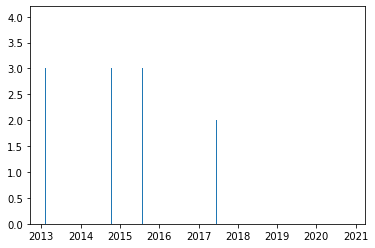

In [80]:
import matplotlib.pyplot as plt
plt.bar(indicadores.T.index, indicadores.T['K-Means'].values)

In [91]:
for i in range(5):
    print(dftime.index[i][1])

-43.495
-43.4949
-43.4947
-43.4946
-43.4945


In [133]:
bandList = tabin.iloc[:,-nbands:].columns.values
bandList[0]

'K-Means'

In [136]:
tabin.loc[dftime.index[709],'Isolation Forest']

11.0

In [144]:
tabin.index[709]

(-20.2452, -43.4705)

In [96]:
nbands = 2
tabin.iloc[:,-nbands:].columns.values

array(['K-Means', 'DBSCAN'], dtype=object)

In [160]:
aw = np.zeros([2,2,2])
aw[0,1,0] = 2
aw[1,1,1] = 3
aw

array([[[0., 0.],
        [2., 0.]],

       [[0., 0.],
        [0., 3.]]])

In [174]:
vsn = tabin.loc[tabin.index,'Isolation Forest'].values
vsn = np.round((vsn/vsn.max())*255)
vsn

array([47., 52., 52., ..., 36., 36., 36.])

In [182]:
lat = []
lon = []
for i in range(len(tabin)):
    lat.append(tabin.index[i][0])
    lon.append(tabin.index[i][1])
    
latu = np.unique(lat)
lonu = np.unique(lon)
print(len(latu),len(lonu))

403 527


In [209]:
def save_tiff_fromdf(df,bands,dummy,path_out):
    
    #caso_vinicius
    lat = []
    lon = []
    for i in range(len(df)):
        lat.append(df.index[i][0])
        lon.append(df.index[i][1])
    
    #caso_felipe
    #lat = df['latitudes'].values
    #lon = df['longitudes'].values
    
    ulat = np.unique(lat)
    ulon = np.unique(lon)
    ncols = len(ulon)
    nrows = len(ulat)
    nbands = len(bands)
    ys = ulat[11]-ulat[10]
    xs = ulon[11]-ulon[10]
    
    arr = np.zeros([nbands, nrows, ncols], np.float32)
    refLat = np.max(ulat)
    refLon = np.min(ulon)
    for j in range(len(df)):
        posLin = np.int64( np.round( (refLat - lat[j])/ys ) )
        posCol = np.int64( np.round( (lon[j] - refLon)/xs ) )
        for b in range(nbands):
            arr[b,posLin,posCol] = df.loc[df.index[j],bands[b]] #Normalizar(?)
            
    transform = (np.min(ulon),xs,0,np.max(ulat),0,-ys)
    target = osr.SpatialReference()
    target.ImportFromEPSG(4326)
    
    driver = gdal.GetDriverByName('GTiff')
    outDs = driver.Create(path_out,ncols,nrows,nbands,gdal.GDT_Float32)
    outDs.SetGeoTransform(transform)
    outDs.SetProjection(target.ExportToWkt())

    ind = 1
    for b in range(nbands):
        bandArr = np.copy(arr[b,:,:])
        outBand = outDs.GetRasterBand(ind)
        outBand.WriteArray(bandArr)
        outBand.FlushCache()
        outBand.SetNoDataValue(dummy)
        ind += 1

    outDs = None
    del outDs, outBand

    return 'ok...'

In [162]:
dummy = -99999
scale = 15
path_out = 'DBSCAN_NDVI.tif'
save_tiff_fromdf(tabin,1,dummy,scale,path_out)

'ok...'

In [184]:
path_out = 'Mari_anomalybands.tif'
save_tiff_fromdf(tabin,6,dummy,scale,path_out)

'ok...'

In [185]:
dftime.index[0]

(-20.2453, -43.495)

In [186]:
tab2 = pd.read_csv('Mariana_NDWI.csv')

In [191]:
tabin2 = tab2.set_index(['Latitude','Longitude'])
tabin2.tail()

02-08-2013  05-08-2014  25-09-2015  11-10-2015  \
Latitude   Longitude                                                      
-20.191141 -43.424673  6.710057e-07   -0.000222   -0.000638   -0.000564   
           -43.424538  7.277192e-07   -0.000162   -0.000673   -0.000493   
           -43.424404  6.407194e-07   -0.000227   -0.000755   -0.000522   
           -43.424269  1.943777e-06   -0.000208   -0.000879   -0.000627   
           -43.424134  2.988630e-06   -0.000190   -0.000785   -0.000579   

                       25-07-2016  10-08-2016    29-08-2017  20-01-2018  \
Latitude   Longitude                                                      
-20.191141 -43.424673   -0.000007   -0.000425 -6.082282e-06    0.000343   
           -43.424538   -0.000056   -0.000343  6.835924e-07    0.000082   
           -43.424404   -0.000065   -0.000443 -1.250578e-05    0.000215   
           -43.424269   -0.000020   -0.000413 -8.911425e-06    0.000091   
           -43.424134   -0.000031   -0.000352  9.838135e-06    0.000064   

                         28-05-2018  01-09-2018  ...  02-02-2020  09-06-2020  \
Latitude   Longitude                             ...                           
-20.191141 -43.424673  2.257771e-06    0.000017  ...   -0.000012   -0.000084   
           -43.424538  2.249017e-05   -0.000005  ...   -0.000237   -0.000132   
           -43.424404  8.970923e-06   -0.000005  ...   -0.000198   -0.000148   
           -43.424269  9.388318e-08   -0.000013  ...   -0.000147   -0.000141   
           -43.424134 -7.596707e-08   -0.000002  ...   -0.000120   -0.000133   

                       25-06-2020    11-07-2020    13-09-2020  29-09-2020  \
Latitude   Longitude                                                        
-20.191141 -43.424673   -0.000044  1.268595e-05  8.295562e-06   -0.000689   
           -43.424538   -0.000103  1.058589e-07 -1.752625e-07   -0.000713   
           -43.424404   -0.000106 -2.755307e-06 -1.630695e-06   -0.000763   
           -43.424269   -0.000098  1.465091e-06 -9.347152e-07   -0.000695   
           -43.424134   -0.000055  3.308768e-07  1.004603e-06   -0.000743   

                       One-Class SVM  Isolation Forest  K-Means  DBSCAN  
Latitude   Longitude                                                     
-20.191141 -43.424673              9                 9        1       5  
           -43.424538              4                 8        1       5  
           -43.424404              4                10        1       4  
           -43.424269              4                 7        1       4  
           -43.424134              4                 9        1       4  

[5 rows x 75 columns]

In [192]:
tabin2.index[0]

(-20.24530910031956, -43.495011210494745)

In [194]:
path_out = 'M_NDWIanomaly.tif'
save_tiff_fromdf(tabin2,4,dummy,scale,path_out)

'ok...'

In [196]:
tabindvi = tab.set_index(tabin2.index)
tabindvi = tabindvi.drop(columns=['Latitude','Longitude'])
tabindvi.tail()

02-08-2013  05-08-2014  25-09-2015  11-10-2015  \
Latitude   Longitude                                                      
-20.191141 -43.424673  5.426648e-07   -0.000277   -0.000893   -0.000736   
           -43.424538  1.816329e-07   -0.000183   -0.000841   -0.000711   
           -43.424404  1.599184e-07   -0.000257   -0.000944   -0.000753   
           -43.424269 -3.901135e-06   -0.000213   -0.001095   -0.000850   
           -43.424134 -5.998139e-06   -0.000194   -0.000978   -0.000785   

                       25-07-2016  10-08-2016  29-08-2017  20-01-2018  \
Latitude   Longitude                                                    
-20.191141 -43.424673   -0.000012   -0.000529   -0.000012    0.000327   
           -43.424538   -0.000052   -0.000406    0.000001    0.000080   
           -43.424404   -0.000060   -0.000524   -0.000022    0.000210   
           -43.424269   -0.000032   -0.000513   -0.000012    0.000099   
           -43.424134   -0.000050   -0.000437    0.000013    0.000070   

                         28-05-2018  01-09-2018  ...  25-06-2020  \
Latitude   Longitude                             ...               
-20.191141 -43.424673  2.312226e-06    0.000004  ...   -0.000036   
           -43.424538  2.434125e-05   -0.000012  ...   -0.000097   
           -43.424404  9.709284e-06   -0.000012  ...   -0.000100   
           -43.424269  7.262874e-07   -0.000014  ...   -0.000095   
           -43.424134 -5.876870e-07   -0.000002  ...   -0.000053   

                         11-07-2020    13-09-2020  29-09-2020  One-Class SVM  \
Latitude   Longitude                                                           
-20.191141 -43.424673  1.257525e-05 -4.003058e-06   -0.000907              4   
           -43.424538  3.041122e-07  9.981144e-07   -0.000884              5   
           -43.424404 -7.915465e-06  9.286759e-06   -0.000946              4   
           -43.424269 -1.063504e-06  4.192819e-06   -0.000879              5   
           -43.424134 -2.401823e-07 -4.506313e-06   -0.000940              3   

                       Local Outlier Factor  Isolation Forest  \
Latitude   Longitude                                            
-20.191141 -43.424673                    12                 7   
           -43.424538                     9                 9   
           -43.424404                     9                 7   
           -43.424269                     8                 7   
           -43.424134                     8                 7   

                       Robust Covariance  K-Means  DBSCAN  
Latitude   Longitude                                       
-20.191141 -43.424673                  7        1       5  
           -43.424538                  7        1       4  
           -43.424404                  7        1       4  
           -43.424269                  7        1       4  
           -43.424134                  7        1       4  

[5 rows x 77 columns]

In [205]:
path_out = 'M_NDVIanomaly.tif'
bandlist = ['One-Class SVM','Isolation Forest','K-Means','DBSCAN']
save_tiff_fromdf(tabindvi,bandlist,dummy,path_out)

'ok...'

In [203]:
tabin.loc[:,bandlist].columns.values

array(['One-Class SVM', 'Isolation Forest', 'K-Means', 'DBSCAN'],
      dtype=object)

In [208]:
tabindvi.loc[:,bandlist[3]]

Latitude    Longitude 
-20.245309  -43.495011    5
            -43.494876    7
            -43.494742    6
            -43.494607    5
            -43.494472    5
                         ..
-20.191141  -43.424673    5
            -43.424538    4
            -43.424404    4
            -43.424269    4
            -43.424134    4
Name: DBSCAN, Length: 212381, dtype: int64